In [14]:
import csv
import numpy as np
import pandas as pd
# import geopandas as gpd
from IPython.display import Image
# from shapely.geometry import Point, Polygon
from math import factorial
import datetime
import time
import scipy
import scipy.signal
import os, os.path

from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.linear_model import LinearRegression
from patsy import cr

# from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sb

import plotly.express as px


import sys
start_time = time.time()

In [45]:
data_dir = "/Users/hn/Documents/01_research_data/chilling/01_data/"
daily_CP_for_CDF = pd.read_csv(data_dir + "/daily_CP_for_CDF.csv")

In [46]:
daily_CP_for_CDF.head(2)

chill_season  year  month  day  daily_portions  cume_portions emission  \
0  chill_2006-2007  2006      9    1             0.0            0.0  RCP 4.5   
1  chill_2006-2007  2006      9    2             0.0            0.0  RCP 4.5   

              location      model  city  
0  48.40625_-119.53125  MRI-CGCM3  Omak  
1  48.40625_-119.53125  MRI-CGCM3  Omak

In [47]:
daily_CP_for_CDF['string_date'] = daily_CP_for_CDF["year"].astype(str) + "-"  + \
                                  daily_CP_for_CDF["month"].astype(str) + "-" + \
                                  daily_CP_for_CDF["day"].astype(str)

daily_CP_for_CDF['Date'] = pd.to_datetime(daily_CP_for_CDF.string_date.values).values

In [48]:
daily_CP_for_CDF.head(2)

chill_season  year  month  day  daily_portions  cume_portions emission  \
0  chill_2006-2007  2006      9    1             0.0            0.0  RCP 4.5   
1  chill_2006-2007  2006      9    2             0.0            0.0  RCP 4.5   

              location      model  city string_date       Date  
0  48.40625_-119.53125  MRI-CGCM3  Omak    2006-9-1 2006-09-01  
1  48.40625_-119.53125  MRI-CGCM3  Omak    2006-9-2 2006-09-02

In [49]:
daily_CP_for_CDF_observed = daily_CP_for_CDF[daily_CP_for_CDF.emission == "observed"].copy()

In [50]:
daily_CP_for_CDF_modeled_historical = daily_CP_for_CDF[daily_CP_for_CDF.emission == "modeled historical"].copy()

daily_CP_for_45 = daily_CP_for_CDF[daily_CP_for_CDF.emission.isin(["RCP 4.5"])].copy()
daily_CP_for_85 = daily_CP_for_CDF[daily_CP_for_CDF.emission.isin(["RCP 8.5"])].copy()

In [52]:
daily_CP_for_CDF_modeled_historical.head(2)

chill_season  year  month  day  daily_portions  cume_portions  \
67936  chill_1950-1951  1950      9    1             0.0            0.0   
67937  chill_1950-1951  1950      9    2             0.0            0.0   

                 emission             location      model  city string_date  \
67936  modeled historical  48.40625_-119.53125  MRI-CGCM3  Omak    1950-9-1   
67937  modeled historical  48.40625_-119.53125  MRI-CGCM3  Omak    1950-9-2   

            Date  
67936 1950-09-01  
67937 1950-09-02

In [62]:
fig = px.line(daily_CP_for_CDF_observed, x = "Date", y = "cume_portions", 
              facet_col = "city", facet_col_wrap=7,
              # facet_row_spacing = 0.04, # default is 0.07 when facet_col_wrap is used
              # facet_col_spacing = 0.04, # default is 0.03
              height = 600, width = 1000,
              title = "cumulative accumulated-chill")

fig

In [72]:
fig = px.line(daily_CP_for_CDF_observed, 
              x = "Date", y = "cume_portions", 
              facet_col = "city", # facet_col_wrap=7,
              # facet_row_spacing = 0.04, # default is 0.07 when facet_col_wrap is used
              # facet_col_spacing = 0.04, # default is 0.03
              height = 800, width = 2000,
              color='chill_season',
              title = "cumulative accumulated-chill")

fig
fig.write_image("/Users/hn/Documents/fig1.png")

In [84]:
daily_CP_for_CDF_observed_oneChillSeason = daily_CP_for_CDF_observed[
                          daily_CP_for_CDF_observed.chill_season == "chill_1980-1981"].copy()

In [85]:
daily_CP_for_CDF_observed_oneChillSeason = daily_CP_for_CDF_observed_oneChillSeason[
                           daily_CP_for_CDF_observed_oneChillSeason.city == "Omak"].copy()

In [86]:
daily_CP_for_CDF_observed_oneChillSeason.shape

(365, 12)

In [87]:
daily_CP_for_CDF_observed_oneChillSeason

chill_season  year  month  day  daily_portions  cume_portions  \
6690266  chill_1980-1981  1980      9    1             0.0       0.000000   
6690267  chill_1980-1981  1980      9    2             0.0       0.000000   
6690268  chill_1980-1981  1980      9    3             0.0       0.000000   
6690269  chill_1980-1981  1980      9    4             0.0       0.000000   
6690270  chill_1980-1981  1980      9    5             0.0       0.000000   
...                  ...   ...    ...  ...             ...            ...   
6690626  chill_1980-1981  1981      8   27             0.0     128.127904   
6690627  chill_1980-1981  1981      8   28             0.0     128.127904   
6690628  chill_1980-1981  1981      8   29             0.0     128.127904   
6690629  chill_1980-1981  1981      8   30             0.0     128.127904   
6690630  chill_1980-1981  1981      8   31             0.0     128.127904   

         emission             location     model  city string_date       Date  
6690266  observed  48.40625_-119.53125  observed  Omak    1980-9-1 1980-09-01  
6690267  observed  48.40625_-119.53125  observed  Omak    1980-9-2 1980-09-02  
6690268  observed  48.40625_-119.53125  observed  Omak    1980-9-3 1980-09-03  
6690269  observed  48.40625_-119.53125  observed  Omak    1980-9-4 1980-09-04  
6690270  observed  48.40625_-119.53125  observed  Omak    1980-9-5 1980-09-05  
...           ...                  ...       ...   ...         ...        ...  
6690626  observed  48.40625_-119.53125  observed  Omak   1981-8-27 1981-08-27  
6690627  observed  48.40625_-119.53125  observed  Omak   1981-8-28 1981-08-28  
6690628  observed  48.40625_-119.53125  observed  Omak   1981-8-29 1981-08-29  
6690629  observed  48.40625_-119.53125  observed  Omak   1981-8-30 1981-08-30  
6690630  observed  48.40625_-119.53125  observed  Omak   1981-8-31 1981-08-31  

[365 rows x 12 columns]

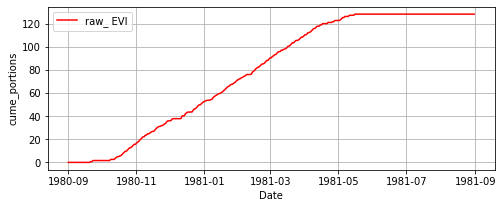

In [88]:
fig, ax = plt.subplots(figsize=(8,3));

ax.plot(daily_CP_for_CDF_observed_oneChillSeason['Date'], daily_CP_for_CDF_observed_oneChillSeason['cume_portions'], 
        c='r', label="cume_portions")

ax.set(xlabel='Date', ylabel='cume_portions')
ax.legend(loc="best");
ax.grid(True)